In [1]:
from network import CNetwork

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
name_dataset = "dataset_1"
dataset_path = "datasetsv2/"
length_cut = 1000
random_flag = True
remove_punctuation = True
lemmatization_flag = True
feature_selection = 'common_words'
measures = ["accs_h3"]#,"dgr_n" "btw", "cc", "sp", "sp_std", "accs_h2", "accs_h3"]

In [5]:
from utils import verifyDir
auxiliar_path = 'auxiliar_folder/' + name_dataset   + '/'
verifyDir(auxiliar_path)

In [6]:
df = pd.read_csv(dataset_path + name_dataset + ".csv")

In [7]:
df.head(5)

,label,text,book
0,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Christine Gehring,...",Right Ho Jeeves
1,Pelham Grenville,"\n\n\n\n\n\n\n\nProduced by Suzanne L. Shell, ...",Tales Of St Austin
2,Joseph Conrad,And that last\n\nword was the single word of ...,Victory
3,Joseph Conrad,\n\n\n\nIf I have ever had these gifts in any ...,Under Western Eyes
4,Bram Stoker,\n\n\n\n Lond...,The Lady Of The Shroud


In [8]:
from utils.text_processing import get_min_len_corpus

In [9]:
print("Min Length:", get_min_len_corpus(list(df["text"])))

Min Length: 55024


In [10]:
from utils.text_processing import get_corpus, get_random_corpus

In [11]:
texts = list(df['text'])

In [12]:
corpus, segmented_corpus = get_corpus(texts, length_cut)

In [13]:
selected_corpus, words_features, word_index, index_word = get_random_corpus(segmented_corpus, remove_punctuation_flag=remove_punctuation, lemmatization_flag=lemmatization_flag,feature_selection = feature_selection)

In [14]:
len(selected_corpus)

78

In [15]:
labels = list(df['label'])

In [16]:
total_classes = list(set(labels))  ## or author
print("Total classes: {}".format(len(total_classes)))
number_books = (df[df['label'] == total_classes[0]]).shape[0]
print("Total entities for each class in train: {}".format(number_books))
dict_categories = {cat: index for index, cat in enumerate(total_classes)}

Total classes: 13
Total entities for each class in train: 6


In [17]:
y = [dict_categories[y] for y in labels]

In [18]:
total_classes

['Joseph Conrad',
 'Pelham Grenville',
 'Hector Hugh',
 'Arthur Conan Doyle',
 'Thomas Hardy',
 'George Eliot',
 'Mark Twain',
 'Daniel Defoe',
 'Jane Austen',
 'Charles Darwin',
 'Charles Dickens',
 'Bram Stoker',
 'Allan Poe']

In [19]:
def get_global_features(sequences, index_word):
    all_network_features = [[] for _ in range(len(sequences))]
    for i,text in enumerate(sequences):
        obj = CNetwork(text, model=None, index_word=index_word, percentages=None, path="")
        network = obj.create_network()
        global_measure = obj.get_network_global_measures(network, measures)
        all_network_features[i] = np.array(global_measure)
    return np.array(all_network_features)

In [20]:
X = get_global_features(selected_corpus, index_word)

Nodes: 411 - Edges: 774
Len features: 1
Nodes: 381 - Edges: 744
Len features: 1
Nodes: 367 - Edges: 776
Len features: 1
Nodes: 389 - Edges: 773
Len features: 1
Nodes: 374 - Edges: 729
Len features: 1
Nodes: 402 - Edges: 768


# Progress:  411/411
# Progress:  381/381
# Progress:  367/367
# Progress:  389/389
# Progress:  374/374
# Progress:  402/402


Len features: 1
Nodes: 351 - Edges: 726
Len features: 1
Nodes: 418 - Edges: 804
Len features: 1
Nodes: 370 - Edges: 783
Len features: 1
Nodes: 419 - Edges: 804
Len features: 1
Nodes: 428 - Edges: 788


# Progress:  351/351
# Progress:  418/418
# Progress:  370/370
# Progress:  419/419
# Progress:  114/428

Len features: 1
Nodes: 357 - Edges: 796
Len features: 1
Nodes: 439 - Edges: 825
Len features: 1
Nodes: 360 - Edges: 758


# Progress:  428/428
# Progress:  357/357
# Progress:  439/439
# Progress:  258/360

Len features: 1
Nodes: 417 - Edges: 778


# Progress:  360/360
# Progress:  417/417
# Progress:  338/338
# Progress:  451/451
# Progress:  395/395


Len features: 1
Nodes: 338 - Edges: 755
Len features: 1
Nodes: 451 - Edges: 777
Len features: 1
Nodes: 395 - Edges: 780
Len features: 1
Nodes: 383 - Edges: 812
Len features: 1
Nodes:

# Progress:  383/383
# Progress:  441/441
# Progress:  332/434

 441 - Edges: 799
Len features: 1
Nodes: 434 - Edges: 801
Len features: 1
Nodes: 361 - Edges: 753


# Progress:  434/434
# Progress:  361/361
# Progress:  373/373
# Progress:  405/405
# Progress:  203/324

Len features: 1
Nodes: 373 - Edges: 766
Len features: 1
Nodes: 405 - Edges: 795
Len features: 1
Nodes: 324 - Edges: 720
Len features: 1
Nodes: 425 - Edges: 803


# Progress:  324/324
# Progress:  425/425
# Progress:  425/425
# Progress:  406/406
# Progress:  170/403

Len features: 1
Nodes: 425 - Edges: 791
Len features: 1
Nodes: 406 - Edges: 765
Len features: 1
Nodes: 403 - Edges: 784
Len features: 1
Nodes: 393 - Edges: 766
Len features: 1
Nodes: 337 - Edges: 723


# Progress:  403/403
# Progress:  393/393
# Progress:  337/337
# Progress:  486/486
# Progress:    0/365

Len features: 1
Nodes: 486 - Edges: 820
Len features: 1
Nodes: 365 - Edges: 706
Len features: 1
Nodes: 424 - Edges: 836
Len features: 1
Nodes: 352 - Edges: 762


# Progress:  365/365
# Progress:  424/424
# Progress:  352/352
# Progress:  202/392

Len features: 1
Nodes: 392 - Edges: 788
Len features: 1
Nodes: 397 - Edges: 798
Len features: 1
Nodes: 449 - Edges: 829
Len features: 1
Nodes: 425 - Edges: 759


# Progress:  392/392
# Progress:  397/397
# Progress:  449/449
# Progress:  425/425
# Progress:   26/413

Len features: 1
Nodes: 413 - Edges: 818
Len features: 1
Nodes: 426 - Edges: 818
Len features: 1
Nodes: 428 - Edges: 804
Len features: 1
Nodes: 328 - Edges: 744


# Progress:  413/413
# Progress:  426/426
# Progress:  428/428
# Progress:  328/328


Len features: 1
Nodes: 455 - Edges: 810
Len features: 1
Nodes: 454 - Edges: 785
Len features: 1
Nodes: 385 - Edges: 742
Len features: 1
Nodes: 399 - Edges: 783


# Progress:  455/455
# Progress:  454/454
# Progress:  385/385


# Progress:  399/399
# Progress:  399/399
# Progress:  385/385
# Progress:  378/378
# Progress:  284/400

Len features: 1
Nodes: 399 - Edges: 794
Len features: 1
Nodes: 385 - Edges: 791
Len features: 1
Nodes: 378 - Edges: 728
Len features: 1
Nodes: 400 - Edges: 774
Len features: 1
Nodes: 409 - Edges: 779


# Progress:  400/400
# Progress:  409/409
# Progress:  412/412
# Progress:  398/398
# Progress:  295/378

Len features: 1
Nodes: 412 - Edges: 806
Len features: 1
Nodes: 398 - Edges: 802
Len features: 1
Nodes: 378 - Edges: 747
Len features: 1
Nodes: 401 - Edges: 754
Len features: 1
Nodes:

# Progress:  378/378
# Progress:  401/401
# Progress:  366/366
# Progress:  369/369
# Progress:  401/401
# Progress:   23/325

 366 - Edges: 740
Len features: 1
Nodes: 369 - Edges: 737
Len features: 1
Nodes: 401 - Edges: 801
Len features: 1
Nodes: 325 - Edges: 739
Len features: 1
Nodes: 382 - Edges: 764


# Progress:  325/325
# Progress:  382/382
# Progress:  376/376
# Progress:  162/286

Len features: 1
Nodes: 376 - Edges: 782
Len features: 1
Nodes: 286 - Edges: 676
Len features: 1
Nodes: 367 - Edges: 742
Len features: 1
Nodes: 425 - Edges: 807


# Progress:  286/286
# Progress:  367/367
# Progress:  425/425
# Progress:  378/378
# Progress:   44/345

Len features: 1
Nodes: 378 - Edges: 766
Len features: 1
Nodes: 345 - Edges: 713
Len features: 1
Nodes: 389 - Edges: 769
Len features: 1
Nodes: 403 - Edges: 796
Len features: 1
Nodes: 395 - Edges: 768


# Progress:  345/345
# Progress:  389/389
# Progress:  403/403
# Progress:  395/395
# Progress:  337/414

Len features: 1
Nodes: 414 - Edges: 808
Len features: 1
Nodes: 435 - Edges: 812
Len features: 1
Nodes: 392 - Edges: 808
Len features: 1
Nodes: 441 - Edges: 793


# Progress:  414/414
# Progress:  435/435
# Progress:  392/392
# Progress:  441/441
# Progress:   57/407

Len features: 1
Nodes: 407 - Edges: 786
Len features: 1
Nodes: 376 - Edges: 766
Len features: 1
Nodes: 390 - Edges: 742
Len features: 1
Nodes: 395 - Edges: 773
Len features: 1


# Progress:  407/407
# Progress:  376/376
# Progress:  390/390
# Progress:  395/395


In [21]:
print("Lenght of features:", X.shape)

Lenght of features: (78, 1)


In [22]:
X

array([[59.08096382],
       [62.50058315],
       [65.98474894],
       [61.99367728],
       [60.20547179],
       [59.69409629],
       [65.67114715],
       [59.0435273 ],
       [68.02576892],
       [57.64418618],
       [55.8142335 ],
       [71.3918979 ],
       [57.95699392],
       [66.71697767],
       [55.69022259],
       [76.90346272],
       [51.99669399],
       [63.00668081],
       [73.06639204],
       [56.75269755],
       [64.56834576],
       [64.13252089],
       [71.05266496],
       [64.53811044],
       [68.98134056],
       [63.46950776],
       [58.45926249],
       [56.5621735 ],
       [64.64037166],
       [58.15042226],
       [70.33685786],
       [58.54425175],
       [57.80594093],
       [64.45922106],
       [76.60183963],
       [69.65822773],
       [69.31222295],
       [58.38289933],
       [50.66748464],
       [66.25743913],
       [64.48047493],
       [60.46967668],
       [75.51714162],
       [58.71815171],
       [54.31995148],
       [55

In [23]:
len(X[0])

1

# Visualize

In [24]:
from utils.visualize_tsne import visualize_tsne

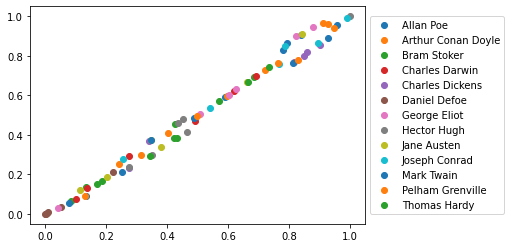

In [25]:
visualize_tsne(X, labels)

# Normalize data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

In [27]:
X = scaler.fit_transform(X)

# Classification

In [28]:
import classifierv2

In [29]:
obj = classifierv2.Classification(X, y)
scores = obj.classification()

[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  8  6 12  6  6  0  4  0 12  9  4  8  6  1  6]
Score 0.0625
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [7 3 0 1 0 3 0 2 0 1 2 9 1 0 0 1]
Score 0.125
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  7  1  1  1  7  0  2  0  1  4  1  1 11  1  0]
Score 0.125
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [7 7 0 1 0 7 0 2 0 1 4 4 0 2 1 0]
Score 0.125
[7, 9, 10, 0, 12, 11, 5, 11, 2, 1, 6, 8, 10, 3, 4, 3] [ 7  7 12  1  0  7 12  2 12  1  4  1 12  8  1 12]
Score 0.125
